In [338]:
using Plots
using DelimitedFiles
using Statistics

In [339]:
function count(runs)
    completed = []
    passed = []
    failed = []
    for r in runs
        if r[1] > 40
            push!(completed, r[1])
        elseif r[1] > 0
            push!(passed, r[1])
        else
            push!(failed, r[1])
        end
    end
    return [length(completed)/length(runs) length(passed) /length(runs) length(failed)/length(runs)]
end
# Average scores for 0.7 iteration w/exploration all safe drivers
exp03_allsafe_runs = [(134.0, 76),
(90.0, 120),
(-1000.0, 42),
(130.0, 80),
(2.2, 200),
(131.0, 79),
(95.0, 115),
(7.167454998082819, 200),
(89.0, 121),]
count(exp03_allsafe_runs)

1×3 Matrix{Float64}:
 0.666667  0.222222  0.111111

In [340]:
# Average for 0.5 iteration w/exploration all safe drivers
exp05_allsafe_runs = [(135.0, 75),
(84.0, 126),
(83.0, 127),
(129.0, 81),
(127.0, 83),
(3.036446726012703, 200),
(83.0, 127),
(135.0, 75),
(-1000.0, 33),
(84.0, 126),
    ]
count(exp05_allsafe_runs)

1×3 Matrix{Float64}:
 0.8  0.1  0.1

In [341]:
# Average for 0.5 iteration w/exploration 0.25 unsafe drivers
exp05_unsafe025_runs = [(6.753749832003416, 200),
 (-1000.0, 25),
 (101.0, 109),
 (-1000.0, 30),
 (155.0, 55),
 (-1000.0, 29),
 (96.0, 114),
 (1.977794655395259, 200),
 (102.0, 108),
 (1.967516104362133, 200),]
count(exp05_unsafe025_runs)

# with safe drivers
#(1.954928245110213, 200)
# (-1000.0, 27)
# (-1000.0, 29)
# (1.53208339281924, 200)
# (101.0, 109)
# (-1000.0, 30)
# (-1000.0, 30)
# (100.0, 110)
# (-1000.0, 43)
# (1.9583573162934038, 200)

1×3 Matrix{Float64}:
 0.4  0.3  0.3

In [342]:
# Average for 0.5 iteration w/exploration half unsafe drivers
exp05_unsafe05_runs = [(-1000.0, 43),
 (115.0, 95),
 (111.0, 99),
 (113.0, 97),
 (-1000.0, 42),
 (-1000.0, 36),
 (2.3860856134664963, 200),
 (-1000.0, 41),
 (-1000.0, 33),
 (114.0, 96),
]
count(exp05_unsafe05_runs)
# Average for agent trained with half unsafe drivers and driving with safe ones
# (131.0, 79)
# (-1000.0, 33)
# (2.388794343068023, 200)
# (113.0, 97)
# (2.3751726014735572, 200)
# (135.0, 75)
# (-1000.0, 34)
# (109.0, 101)
# (96.0, 114)
# (128.0, 82)

1×3 Matrix{Float64}:
 0.4  0.1  0.5

In [343]:
# lawless human driver + 0.5 others
(137.0, 73)
(135.0, 75)
(136.0, 74)
(148.0, 62)
(136.0, 74)
(138.0, 72)
(141.0, 69)
(137.0, 73)
(142.0, 68)
(-1000.0, 34)

(-1000.0, 34)

In [344]:
infile = "finaldata/convergence_exp03_unsafe0.txt"
exp03_allsafe = readdlm(infile, ',', Float64, '\n', header=false)
infile = "finaldata/convergence_exp05_unsafe0.txt"
exp05_allsafe = readdlm(infile, ',', Float64, '\n', header=false)
infile = "finaldata/convergence_exp05_unsafe05.txt"
exp05_unsafe05 = readdlm(infile, ',', Float64, '\n', header=false)
infile = "finaldata/convergence_exp05_unsafe025.txt"
exp05_unsafe025 = readdlm(infile, ',', Float64, '\n', header=false)

55×1 Matrix{Float64}:
 9.819560110457704
 0.3233498299303358
 0.01978636473049136
 0.0164531742870524
 0.6623148402699612
 0.4335615913057776
 0.47077129409164326
 0.024856422885245116
 0.3109640106686203
 0.36350739124590975
 0.22391924709665348
 0.24802230377091908
 0.9557959521865743
 ⋮
 0.29948909873207424
 0.3225850554874048
 0.018607222755728625
 0.12123740402960609
 0.013973726701504404
 0.015593477087830314
 0.009957533112742015
 0.0007084569344256972
 0.0005376540682077294
 0.000864236153563801
 0.001401484301415389
 0.00047275601957808835

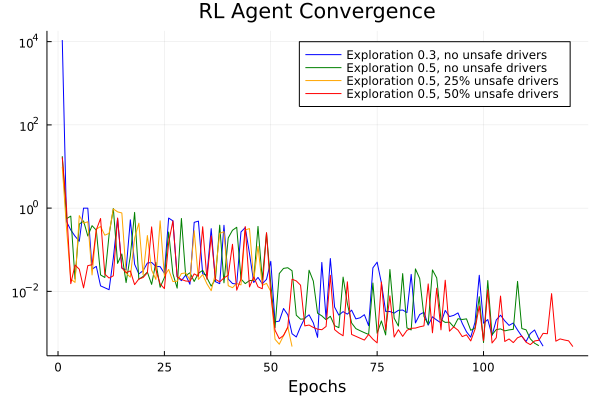

In [345]:
plot(1:length(exp03_allsafe), exp03_allsafe[:,1], label="Exploration 0.3, no unsafe drivers", color=:blue)
plot!(1:length(exp05_allsafe), exp05_allsafe[:,1], label="Exploration 0.5, no unsafe drivers", yaxis=:log, color=:green)
plot!(1:length(exp05_unsafe025), exp05_unsafe025[:,1], label="Exploration 0.5, 25% unsafe drivers", color=:orange)
plot!(1:length(exp05_unsafe05), exp05_unsafe05[:,1], label="Exploration 0.5, 50% unsafe drivers", color=:red)
title!("RL Agent Convergence")
xlabel!("Epochs")

In [346]:
savefig("writeup/figures/final_convergence.pdf")

# Baseline with hand-coded agent

In [347]:
include("finaldata/lawful_baseline_runs.jl")
lawful_human_5 = vcat(count(lawful_agent_5_0),
    count(lawful_agent_5_025),
    count(lawful_agent_5_05))
for i=1:3
    println(lawful_human_5[i,:])
end

[0.2, 0.275, 0.525]
[0.175, 0.2, 0.625]
[0.075, 0.325, 0.6]


In [348]:
include("finaldata/lawless_baseline_runs.jl")
lawless_human_5 = vcat(count(lawless_agent_5_0),
    count(lawless_agent_5_025),
    count(lawless_agent_5_05))
for i=1:3
    println(lawless_human_5[i,:])
end

[0.06060606060606061, 0.3939393939393939, 0.5454545454545454]
[0.18604651162790697, 0.16279069767441862, 0.6511627906976745]
[0.05128205128205128, 0.28205128205128205, 0.6666666666666666]


In [349]:
flatten_state(s1, s2, s3) = (s1-1) * 11*11 + (s2-1)*11 + s3-1
function unflatten_state(f)
    s1 = 1 + div(f, 11*11)
    f -= (s1-1)*11*11
    s2 = 1 + div(f, 11)
    f -= (s2-1)*11
    s3 = f+1
    return (s1, s2, s3)
end

unflatten_state (generic function with 1 method)

In [350]:
infile = "u_exp05_unsafe05.txt"
u_exp05_unsafe05 = readdlm(infile, ',', Float64, '\n', header=false)
U = zeros((30,11,11))
for i=1:length(u_exp05_unsafe05)-1
    U[unflatten_state(i)...] = u_exp05_unsafe05[i]
end
println("Loaded data")

Loaded data


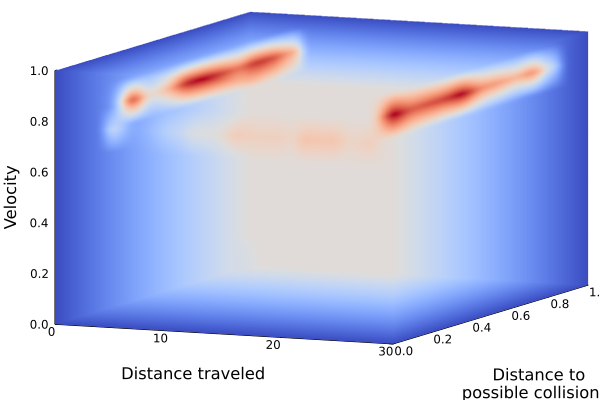

In [351]:
heatmap(U[:, :, :], xlabel="Distance traveled", ylabel="Distance to\npossible collision   ", zlabel="Velocity", colorbar=true)

In [352]:
savefig("poorly_explored.pdf")

# New trial data

In [353]:
include("finaldata/exp03_unsafe0_runs.jl")
println("exp03_unsafe0, 0, 0.25, 0.5")
exp03_unsafe0 = vcat(count(exp03_unsafe0_5_unsafe0),
    count(exp03_unsafe0_5_unsafe025),
    count(exp03_unsafe0_5_unsafe05))
for i=1:3
    println(exp03_unsafe0[i,:])
end

exp03_unsafe0, 0, 0.25, 0.5
[0.0, 0.25, 0.75]
[0.1, 0.3, 0.6]
[0.0, 0.15, 0.85]


In [354]:
include("finaldata/exp05_unsafe0_runs.jl")
println("exp05_unsafe 0, 0, 0.25, 0.5")
exp05_unsafe0 = vcat(count(exp05_unsafe0_5_unsafe0),
    count(exp05_unsafe0_5_unsafe025),
    count(exp05_unsafe0_5_unsafe05))
for i=1:3
    println(exp05_unsafe0[i,:])
end

exp05_unsafe 0, 0, 0.25, 0.5
[0.075, 0.4, 0.525]
[0.1111111111111111, 0.3055555555555556, 0.5833333333333334]
[0.15, 0.25, 0.6]


In [355]:
include("finaldata/exp05_unsafe025_runs.jl")
println("exp05_unsafe025, 0, 0.25, 0.5")
exp05_unsafe025 = vcat(count(exp05_unsafe025_5_unsafe0),
    count(exp05_unsafe025_5_unsafe025),
    count(exp05_unsafe025_5_unsafe05))
for i=1:3
    println(exp05_unsafe025[i,:])
end

exp05_unsafe025, 0, 0.25, 0.5
[0.1, 0.25, 0.65]
[0.15, 0.25, 0.6]
[0.1, 0.4, 0.5]


In [356]:
include("finaldata/exp05_unsafe05_runs.jl")
println("exp05_unsafe05, 0, 0.25, 0.5")
exp05_unsafe05 = vcat(count(exp05_unsafe05_5_unsafe0),
    count(exp05_unsafe05_5_unsafe025),
    count(exp05_unsafe05_5_unsafe05))
for i=1:3
    println(exp05_unsafe05[i,:])
end

exp05_unsafe05, 0, 0.25, 0.5
[0.15151515151515152, 0.24242424242424243, 0.6060606060606061]
[0.15, 0.2, 0.65]
[0.14705882352941177, 0.2647058823529412, 0.5882352941176471]


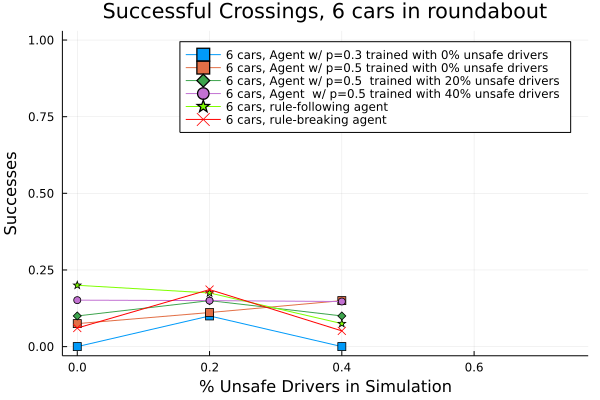

In [357]:
xp = [0.0, 0.2, 0.4]
i = 1 # successes
plot(xp, exp03_unsafe0[:,i], label="6 cars, Agent w/ p=0.3 trained with 0% unsafe drivers", ylim=[0,1], xlim=[0,0.75], ylabel="Successes", xlabel="% Unsafe Drivers in Simulation", markers=:square)
plot!(xp, exp05_unsafe0[:,i], label="6 cars, Agent w/ p=0.5 trained with 0% unsafe drivers", markers=:square)
plot!(xp, exp05_unsafe025[:,i], label="6 cars, Agent w/ p=0.5  trained with 20% unsafe drivers", markers=:diamond)
plot!(xp, exp05_unsafe05[:,i], label="6 cars, Agent  w/ p=0.5 trained with 40% unsafe drivers", markers=:circle)
plot!(xp, lawful_human_5[:,i], label="6 cars, rule-following agent", markers=:star, color=:chartreuse)
plot!(xp, lawless_human_5[:,i], label="6 cars, rule-breaking agent", markers=:x, color=:red)
title!("Successful Crossings, 6 cars in roundabout")

In [358]:
savefig("writeup/figures/successes.pdf")

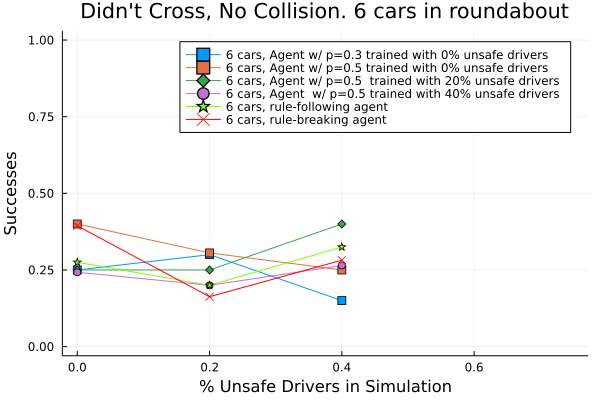

In [359]:
i = 2 # crossings
plot(xp, exp03_unsafe0[:,i], label="6 cars, Agent w/ p=0.3 trained with 0% unsafe drivers", ylim=[0,1], xlim=[0,0.75], ylabel="Successes", xlabel="% Unsafe Drivers in Simulation", markers=:square)
plot!(xp, exp05_unsafe0[:,i], label="6 cars, Agent w/ p=0.5 trained with 0% unsafe drivers", markers=:square)
plot!(xp, exp05_unsafe025[:,i], label="6 cars, Agent w/ p=0.5  trained with 20% unsafe drivers", markers=:diamond)
plot!(xp, exp05_unsafe05[:,i], label="6 cars, Agent  w/ p=0.5 trained with 40% unsafe drivers", markers=:circle)
plot!(xp, lawful_human_5[:,i], label="6 cars, rule-following agent", markers=:star, color=:chartreuse)
plot!(xp, lawless_human_5[:,i], label="6 cars, rule-breaking agent", markers=:x, color=:red)
title!("Didn't Cross, No Collision. 6 cars in roundabout")

In [360]:
savefig("writeup/figures/passes.pdf")

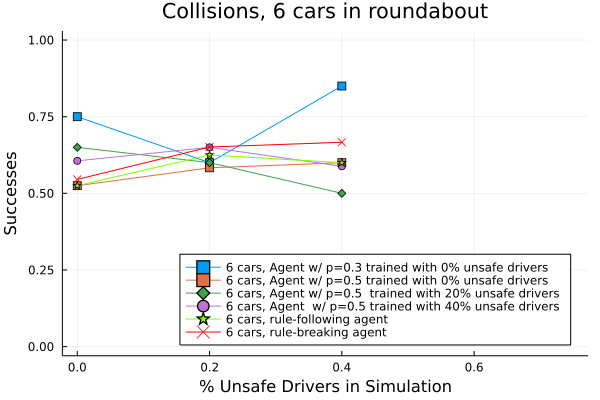

In [361]:
i = 3 # failures
plot(xp, exp03_unsafe0[:,i], label="6 cars, Agent w/ p=0.3 trained with 0% unsafe drivers", ylim=[0,1], xlim=[0,0.75], ylabel="Successes", xlabel="% Unsafe Drivers in Simulation", markers=:square, legend=:bottomright)
plot!(xp, exp05_unsafe0[:,i], label="6 cars, Agent w/ p=0.5 trained with 0% unsafe drivers", markers=:square)
plot!(xp, exp05_unsafe025[:,i], label="6 cars, Agent w/ p=0.5  trained with 20% unsafe drivers", markers=:diamond)
plot!(xp, exp05_unsafe05[:,i], label="6 cars, Agent  w/ p=0.5 trained with 40% unsafe drivers", markers=:circle)
plot!(xp, lawful_human_5[:,i], label="6 cars, rule-following agent", markers=:star, color=:chartreuse)
plot!(xp, lawless_human_5[:,i], label="6 cars, rule-breaking agent", markers=:x, color=:red)
title!("Collisions, 6 cars in roundabout")

In [362]:
savefig("writeup/figures/collisions.pdf")

In [363]:
include("finaldata/exp03_unsafe0_3_runs.jl")
println("exp03_unsafe0, 0, 0.25, 0.5")
exp03_unsafe0_3 = vcat(count(exp03_unsafe0_3_unsafe0),
    count(exp03_unsafe0_3_unsafe025),
    count(exp03_unsafe0_3_unsafe05))
for i=1:3
    println(exp03_unsafe0_3[i,:])
end

include("finaldata/exp05_unsafe0_3_runs.jl")
println("\nexp05_unsafe0, 0, 0.25, 0.5")
exp05_unsafe0_3 = vcat(count(exp05_unsafe0_3_unsafe0),
    count(exp05_unsafe0_3_unsafe025),
    count(exp05_unsafe0_3_unsafe05))
for i=1:3
    println(exp05_unsafe0_3[i,:])
end

include("finaldata/exp05_unsafe025_3_runs.jl")
println("\nexp05_unsafe025, 0, 0.25, 0.5")
exp05_unsafe025_3 = vcat(count(exp05_unsafe025_3_unsafe0),
    count(exp05_unsafe025_3_unsafe025),
    count(exp05_unsafe025_3_unsafe05))
for i=1:3
    println(exp05_unsafe025_3[i,:])
end

include("finaldata/exp05_unsafe05_3_runs.jl")
println("\nexp05_unsafe05, 0, 0.25, 0.5")
exp05_unsafe05_3 = vcat(count(exp05_unsafe05_3_unsafe0),
    count(exp05_unsafe05_3_unsafe025),
    count(exp05_unsafe05_3_unsafe05))
for i=1:3
    println(exp05_unsafe05_3[i,:])
end

include("finaldata/lawful_baseline_3_runs.jl")
println("\nlawful baseline, 0, 0.25, 0.5")
lawful_human_3 = vcat(count(lawful_agent_3_0),
    count(lawful_agent_3_025),
    count(lawful_agent_3_05))
for i=1:3
    println(lawful_human_3[i,:])
end

include("finaldata/lawless_baseline_3_runs.jl")
println("\nlawless baseline, 0, 0.25, 0.5")
lawless_human_3 = vcat(count(lawless_agent_3_0),
    count(lawless_agent_3_025),
    count(lawless_agent_3_05))
for i=1:3
    println(lawless_human_3[i,:])
end

exp03_unsafe0, 0, 0.25, 0.5
[0.425, 0.475, 0.1]
[0.625, 0.3, 0.075]
[0.525, 0.4, 0.075]

exp05_unsafe0, 0, 0.25, 0.5
[0.625, 0.375, 0.0]
[0.5, 0.4, 0.1]
[0.65, 0.25, 0.1]

exp05_unsafe025, 0, 0.25, 0.5
[0.425, 0.4, 0.175]
[0.375, 0.45, 0.175]
[0.525, 0.375, 0.1]

exp05_unsafe05, 0, 0.25, 0.5
[0.775, 0.175, 0.05]
[0.625, 0.275, 0.1]
[0.65, 0.325, 0.025]

lawful baseline, 0, 0.25, 0.5
[0.9240506329113924, 0.0, 0.0759493670886076]
[0.925, 0.0, 0.075]
[0.95, 0.0, 0.05]

lawless baseline, 0, 0.25, 0.5
[0.925, 0.0, 0.075]
[0.9, 0.0, 0.1]
[0.8860759493670886, 0.0, 0.11392405063291139]


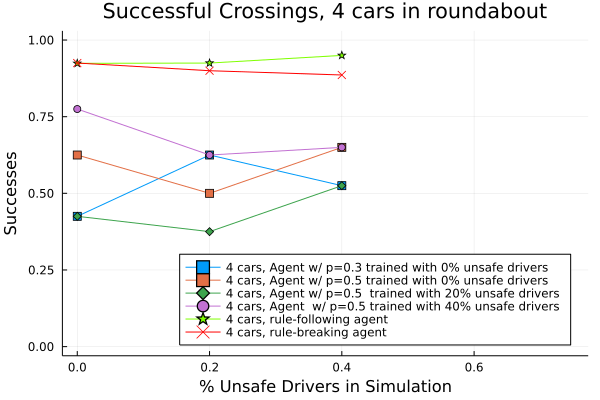

In [364]:
xp = [0.0, 0.2, 0.4]
i = 1 # successes
plot(xp, exp03_unsafe0_3[:,i], label="4 cars, Agent w/ p=0.3 trained with 0% unsafe drivers", ylim=[0,1], xlim=[0,0.75], ylabel="Successes", xlabel="% Unsafe Drivers in Simulation", markers=:square, legend=:bottomright)
plot!(xp, exp05_unsafe0_3[:,i], label="4 cars, Agent w/ p=0.5 trained with 0% unsafe drivers", markers=:square)
plot!(xp, exp05_unsafe025_3[:,i], label="4 cars, Agent w/ p=0.5  trained with 20% unsafe drivers", markers=:diamond)
plot!(xp, exp05_unsafe05_3[:,i], label="4 cars, Agent  w/ p=0.5 trained with 40% unsafe drivers", markers=:circle)
plot!(xp, lawful_human_3[:,i], label="4 cars, rule-following agent", markers=:star, color=:chartreuse)
plot!(xp, lawless_human_3[:,i], label="4 cars, rule-breaking agent", markers=:x, color=:red)
title!("Successful Crossings, 4 cars in roundabout")

In [365]:
savefig("writeup/figures/successes_3.pdf")

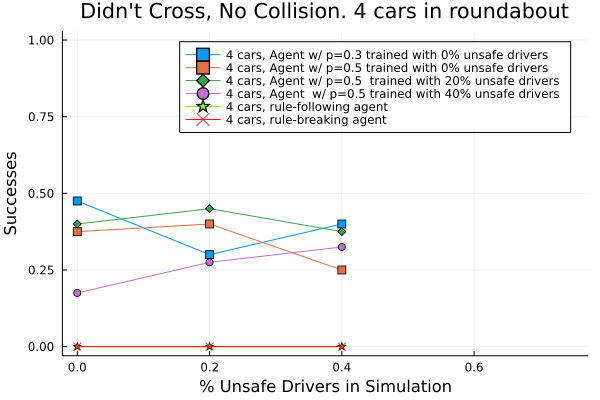

In [366]:
i = 2 # crossings
plot(xp, exp03_unsafe0_3[:,i], label="4 cars, Agent w/ p=0.3 trained with 0% unsafe drivers", ylim=[0,1], xlim=[0,0.75], ylabel="Successes", xlabel="% Unsafe Drivers in Simulation", markers=:square)
plot!(xp, exp05_unsafe0_3[:,i], label="4 cars, Agent w/ p=0.5 trained with 0% unsafe drivers", markers=:square)
plot!(xp, exp05_unsafe025_3[:,i], label="4 cars, Agent w/ p=0.5  trained with 20% unsafe drivers", markers=:diamond)
plot!(xp, exp05_unsafe05_3[:,i], label="4 cars, Agent  w/ p=0.5 trained with 40% unsafe drivers", markers=:circle)
plot!(xp, lawful_human_3[:,i], label="4 cars, rule-following agent", markers=:star, color=:chartreuse)
plot!(xp, lawless_human_3[:,i], label="4 cars, rule-breaking agent", markers=:x, color=:red)
title!("Didn't Cross, No Collision. 4 cars in roundabout")

In [367]:
savefig("writeup/figures/passes_3.pdf")

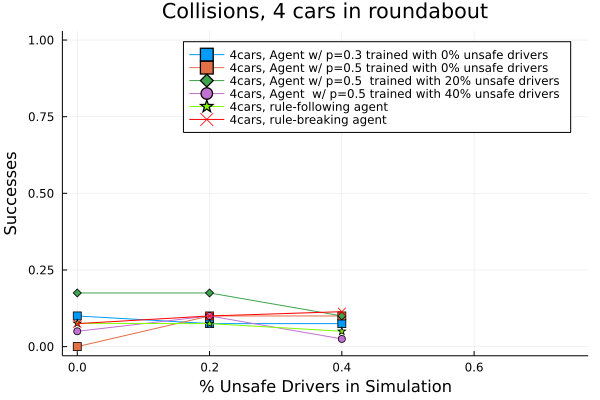

In [368]:
i = 3 # failures
plot(xp, exp03_unsafe0_3[:,i], label="4cars, Agent w/ p=0.3 trained with 0% unsafe drivers", ylim=[0,1], xlim=[0,0.75], ylabel="Successes", xlabel="% Unsafe Drivers in Simulation", markers=:square, legend=:topright)
plot!(xp, exp05_unsafe0_3[:,i], label="4cars, Agent w/ p=0.5 trained with 0% unsafe drivers", markers=:square)
plot!(xp, exp05_unsafe025_3[:,i], label="4cars, Agent w/ p=0.5  trained with 20% unsafe drivers", markers=:diamond)
plot!(xp, exp05_unsafe05_3[:,i], label="4cars, Agent  w/ p=0.5 trained with 40% unsafe drivers", markers=:circle)
plot!(xp, lawful_human_3[:,i], label="4cars, rule-following agent", markers=:star, color=:chartreuse)
plot!(xp, lawless_human_3[:,i], label="4cars, rule-breaking agent", markers=:x, color=:red)
title!("Collisions, 4 cars in roundabout")

In [369]:
savefig("writeup/figures/collisions_3.pdf")

# Comparing the policies

In [370]:
include("lane_specific_driver.jl")
n_states = 30*11*11
L = 30
γ = 0.9
p = 0.5 # exploitation fraction
nticks = n_states
agent = initialize_agent(γ, p, nticks+1)
# only s1, s2, s3 matter here
model = InterDriver(LaneSpecificAccelLatLon(0.0,0.0), 0, 10, 10, :ZERO, :RL, 1.0, agent)

rule_following_actions = zeros(n_states)
rule_breaking_actions = zeros(n_states)

for s=1:n_states
    (model.s1, model.s2, model.s3) = unflatten_state(s)
    # mapping maps :ACCEL, :ZERO, :DECEL to 1, 2, 3 - it comes from lane_specific_driver.jl
    rule_following_actions[s] = mapping[get_safe_action(model)]
    rule_breaking_actions[s] = mapping[get_unsafe_action(model)]
end

In [371]:
# count differences
diffs_breaking = sum(rule_following_actions .!= rule_breaking_actions) / n_states

0.08181818181818182

In [372]:
# now let's get the RL policies, here only U matters
function get_actions(model)
    actions = zeros(n_states)
    model.agent.ptr = 1 # because the rl agent saves its state/action transitions
    for s=1:n_states
        (model.s1, model.s2, model.s3) = unflatten_state(s)
        actions[s] = mapping[get_rl_action(model)]
    end
    return actions
end

# Gather data
infile = "finaldata/u_exp03_unsafe0.txt"
model.agent.U = readdlm(infile, ',', Float64, '\n', header=false)
exp03_unsafe0_actions =  get_actions(model)

infile = "finaldata/u_exp05_unsafe0.txt"
model.agent.U = readdlm(infile, ',', Float64, '\n', header=false)
exp05_unsafe0_actions =  get_actions(model)

infile = "finaldata/u_exp05_unsafe025.txt"
model.agent.U = readdlm(infile, ',', Float64, '\n', header=false)
exp05_unsafe025_actions =  get_actions(model)

infile = "finaldata/u_exp05_unsafe05.txt"
model.agent.U = readdlm(infile, ',', Float64, '\n', header=false)
exp05_unsafe05_actions =  get_actions(model)

println(diffs_breaking)
diffs_exp03_unsafe0 = sum(rule_following_actions .!= exp03_unsafe0_actions) / n_states
println(diffs_exp03_unsafe0)
diffs_exp05_unsafe0 = sum(rule_following_actions .!= exp05_unsafe0_actions) / n_states
println(diffs_exp05_unsafe0)
diffs_exp05_unsafe025 = sum(rule_following_actions .!= exp05_unsafe025_actions) / n_states
println(diffs_exp05_unsafe025)
diffs_exp05_unsafe05 = sum(rule_following_actions .!= exp05_unsafe05_actions) / n_states
println(diffs_exp05_unsafe05)

0.08181818181818182
0.6526170798898072
0.6666666666666666
0.6730027548209366
0.6702479338842975


In [373]:
# Where do they differ by 2? eg accel instead of decel
diffs_breaking2 = sum(abs.(rule_following_actions - rule_breaking_actions) .== 2) / n_states
println(diffs_breaking2)

diffs_exp03_unsafe0 = sum(abs.(rule_following_actions - exp03_unsafe0_actions) .== 2) / n_states
println(diffs_exp03_unsafe0)
diffs_exp05_unsafe0 = sum(abs.(rule_following_actions - exp05_unsafe0_actions) .== 2) / n_states
println(diffs_exp05_unsafe0)
diffs_exp05_unsafe025 = sum(abs.(rule_following_actions - exp05_unsafe025_actions) .== 2) / n_states
println(diffs_exp05_unsafe025)
diffs_exp05_unsafe05 = sum(abs.(rule_following_actions - exp05_unsafe05_actions) .== 2) / n_states
println(diffs_exp05_unsafe05)

0.06694214876033058
0.26721763085399447
0.2721763085399449
0.27823691460055094
0.27713498622589533


In [374]:
# are they different if we compare it to the rule breaking policy?
println(diffs_breaking)
diffs_exp03_unsafe0 = sum(rule_breaking_actions .!= exp03_unsafe0_actions) / n_states
println(diffs_exp03_unsafe0)
diffs_exp05_unsafe0 = sum(rule_breaking_actions .!= exp05_unsafe0_actions) / n_states
println(diffs_exp05_unsafe0)
diffs_exp05_unsafe025 = sum(rule_breaking_actions .!= exp05_unsafe025_actions) / n_states
println(diffs_exp05_unsafe025)
diffs_exp05_unsafe05 = sum(rule_breaking_actions .!= exp05_unsafe05_actions) / n_states
println(diffs_exp05_unsafe05)

0.08181818181818182
0.6550964187327823
0.6666666666666666
0.6713498622589532
0.6672176308539944


In [375]:
# Where do they differ by 2? eg accel instead of decel
println(diffs_breaking2)

diffs_exp03_unsafe0 = sum(abs.(rule_breaking_actions - exp03_unsafe0_actions) .== 2) / n_states
println(diffs_exp03_unsafe0)
diffs_exp05_unsafe0 = sum(abs.(rule_breaking_actions - exp05_unsafe0_actions) .== 2) / n_states
println(diffs_exp05_unsafe0)
diffs_exp05_unsafe025 = sum(abs.(rule_breaking_actions - exp05_unsafe025_actions) .== 2) / n_states
println(diffs_exp05_unsafe025)
diffs_exp05_unsafe05 = sum(abs.(rule_breaking_actions - exp05_unsafe05_actions) .== 2) / n_states
println(diffs_exp05_unsafe05)

0.06694214876033058
0.2647382920110193
0.26831955922865014
0.2716253443526171
0.2713498622589532
